# **Optimizing New York City Taxi Services through Predictive Analytics**
---

**Team Member: Unice(Yu-Fang) Liao, Jiacheng Li, Shizuka Takahashi, Pengru Lin**


# **Table of Contents**

I. Introduction

II. Data Exploration and Cleaning

III. Models
      
IV. Hyper Parameter Search

V. Feature Importance

VI. Result

VII. Implications

VIII. Reference

# **I. Introduction**
---

## **1. Business Problem**
---

In the bustling metropolis, the iconic yellow taxis are more than just a means of transportation; they are a dynamic part of the urban fabric. However, there are many reports and concerns raised by travelers around the world that in some cases, these taxi drivers abusively overcharged the customers, preventing tourists from reaching the full happiness they spent in New York. Besides, taxi companies are facing more challenges in managing the price system and operation processes nowadays. To solve and challenge this unfair practice, our project dives into the heart of this vibrant taxi ecosystem, leveraging machine learning models to find the insights behind the dataset.

## **2. Data Source**
---
TLC Trip Record Data - Yellow Taxi Trip Records. Direct access [here](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).

## **3. Data Dictionary**

| Dataframe Name         | Brief Description                                                                                               |
|------------------------|-----------------------------------------------------------------------------------------------------------------|
| VendorID               | A code indicating the TPEP provider that provided the record. 1 = Creative Mobile Technologies, LLC; 2 = VeriFone Inc. |
| tpep_pickup_datetime   | The date and time when the meter was engaged.                                                                    |
| tpep_dropoff_datetime  | The date and time when the meter was disengaged.                                                                 |
| Passenger_count        | The number of passengers in the vehicle. This is a driver-entered value.                                         |
| Trip_distance          | The elapsed trip distance in miles reported by the taximeter.                                                     |
| PULocationID           | TLC Taxi Zone in which the taximeter was engaged.                                                                 |
| DOLocationID           | TLC Taxi Zone in which the taximeter was disengaged.                                                              |
| RateCodeID             | The final rate code in effect at the end of the trip. 1 = Standard rate; 2 = JFK; 3 = Newark; 4 = Nassau or Westchester; 5 = Negotiated fare; 6 = Group ride |
| Store_and_fwd_flag     | Indicates whether the trip record was held in vehicle memory before sending to the vendor (Y = store and forward trip, N = not a store and forward trip). |
| Payment_type           | A numeric code signifying how the passenger paid for the trip. 1 = Credit card; 2 = Cash; 3 = No charge; 4 = Dispute; 5 = Unknown; 6 = Voided trip |
| Fare_amount            | The time-and-distance fare calculated by the meter.                                                               |
| Extra                  | Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges.|
| MTA_tax                 | \$0.50 MTA tax that is automatically triggered based on the metered rate in use. |
| Improvement_surcharge   | \$0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
| Tip_amount             | Tip amount – This field is automatically populated for credit card tips. Cash tips are not included.             |
| Tolls_amount           | Total amount of all tolls paid in the trip.                                                                      |
| Total_amount           | The total amount charged to passengers. Does not include cash tips.                                               |
| Congestion_Surcharge   | Total amount collected in the trip for NYS congestion surcharge.                                                  |
| Airport_fee            | $1.25 for pick up only at LaGuardia and John F. Kennedy Airports.                                                |


The dataset consists of 19 columns, featuring a combination of data types, including int64, datetime64, float64, and object. Each row represents a unique taxi trip record, encapsulating various aspects such as trip distance, duration, fare amount, and other related attributes, offering a comprehensive overview of taxi service operations.

# **II. Data Exploration and Cleaning**
---

## **1. Data Exploration**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the yellow taxi data
import pyarrow.parquet as pq
ylw = pq.read_table('/content/drive/MyDrive/BA810_Supervised_Machine_Learning/team_project/yellow_tripdata_2023-01.parquet')
loc = pd.read_csv('/content/drive/MyDrive/BA810_Supervised_Machine_Learning/team_project/taxi+_zone_lookup.csv')
ylw = ylw.to_pandas()
ylw

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN


In [ ]:
# Since the original dataset is too big (about 3 million rows), we randomly pick 80k of the rows as the data that we are going to use
data = ylw.sample(n=80000, random_state=42)
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
2790731,2,2023-01-29 17:52:02,2023-01-29 17:56:43,1.0,1.17,1.0,N,262,74,2,7.2,0.0,0.5,0.00,0.0,1.0,11.20,2.5,0.00
666153,1,2023-01-08 15:57:24,2023-01-08 16:02:47,1.0,0.90,1.0,N,229,237,2,6.5,2.5,0.5,0.00,0.0,1.0,10.50,2.5,0.00
1985683,2,2023-01-21 19:38:01,2023-01-21 19:45:02,1.0,0.95,1.0,N,45,261,1,7.9,0.0,0.5,2.38,0.0,1.0,14.28,2.5,0.00
2154231,2,2023-01-23 16:07:31,2023-01-23 16:26:46,5.0,0.88,1.0,N,237,141,1,16.3,2.5,0.5,1.50,0.0,1.0,24.30,2.5,0.00
2493619,2,2023-01-26 21:21:08,2023-01-26 21:24:48,2.0,1.03,1.0,N,229,140,1,6.5,1.0,0.5,2.30,0.0,1.0,13.80,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383698,2,2023-01-25 20:01:39,2023-01-25 20:05:46,1.0,1.10,1.0,N,264,262,1,6.5,1.0,0.5,2.30,0.0,1.0,13.80,2.5,0.00
1307001,2,2023-01-14 23:10:39,2023-01-14 23:18:07,3.0,0.94,1.0,N,234,164,1,8.6,1.0,0.5,2.72,0.0,1.0,16.32,2.5,0.00
1718845,2,2023-01-19 11:35:36,2023-01-19 11:54:43,1.0,2.10,1.0,N,43,170,1,17.7,0.0,0.5,2.50,0.0,1.0,24.20,2.5,0.00
1043516,2,2023-01-12 16:34:26,2023-01-12 16:40:23,1.0,2.69,1.0,N,132,10,2,12.8,2.5,0.5,0.00,0.0,1.0,18.05,0.0,1.25


In [ ]:
# The information of the selected data
data.info()
data.head()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 2790731 to 1229774
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               80000 non-null  int64         
 1   tpep_pickup_datetime   80000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  80000 non-null  datetime64[ns]
 3   passenger_count        78174 non-null  float64       
 4   trip_distance          80000 non-null  float64       
 5   RatecodeID             78174 non-null  float64       
 6   store_and_fwd_flag     78174 non-null  object        
 7   PULocationID           80000 non-null  int64         
 8   DOLocationID           80000 non-null  int64         
 9   payment_type           80000 non-null  int64         
 10  fare_amount            80000 non-null  float64       
 11  extra                  80000 non-null  float64       
 12  mta_tax                80000 non-null  float64      

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,80000.000000,78174.000000,80000.000000,78174.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,78174.000000,78174.000000
mean,1.731413,1.362742,3.492477,1.517461,166.448625,164.452063,1.194825,18.333617,1.537285,0.488111,3.372261,0.509575,0.981835,26.981323,2.270544,0.107101
std,0.443228,0.892067,29.090709,6.622707,64.272848,69.853799,0.529525,17.581189,1.785985,0.099552,3.841480,1.997324,0.184825,21.963444,0.778091,0.355309
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-231.900000,-7.500000,-0.500000,-0.900000,-65.000000,-1.000000,-254.950000,-2.500000,-1.250000
25%,1.000000,1.000000,1.060000,1.000000,132.000000,114.000000,1.000000,8.600000,0.000000,0.500000,1.000000,0.000000,1.000000,15.400000,2.500000,0.000000
50%,2.000000,1.000000,1.800000,1.000000,162.000000,162.000000,1.000000,12.800000,1.000000,0.500000,2.740000,0.000000,1.000000,20.160000,2.500000,0.000000
75%,2.000000,1.000000,3.330000,1.000000,234.000000,234.000000,1.000000,20.500000,2.500000,0.500000,4.200000,0.000000,1.000000,28.700000,2.500000,0.000000
max,2.000000,6.000000,7729.750000,99.000000,265.000000,265.000000,4.000000,400.000000,11.250000,1.600000,200.000000,51.000000,1.000000,487.440000,2.500000,1.250000


<ipython-input-7-91bdfbf1b627>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


<Axes: >

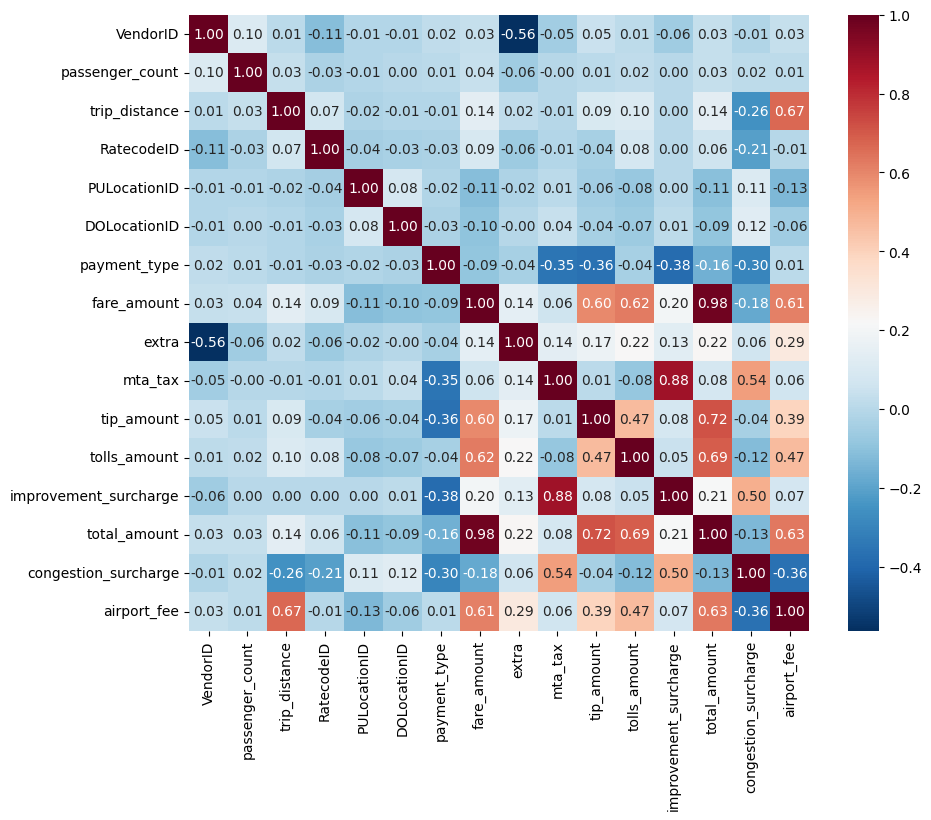

In [ ]:
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdBu_r')

The heatmap is used to represent the correlation matrix of the dataset. The color coding from red to blue indicates the strength and direction of the correlation between the variables, with 1.0 indicating a perfect positive correlation and -1.0 indicating a perfect negative correlation. We observe that some pairs of features, like **total_amount** and **fare_amount**, have a very high positive correlation (0.98), suggesting that as one increases, the other tends to increase as well. Conversely, extra and mta_tax have a strong negative correlation with payment_type, indicated by values around -0.56 and -0.35, respectively.

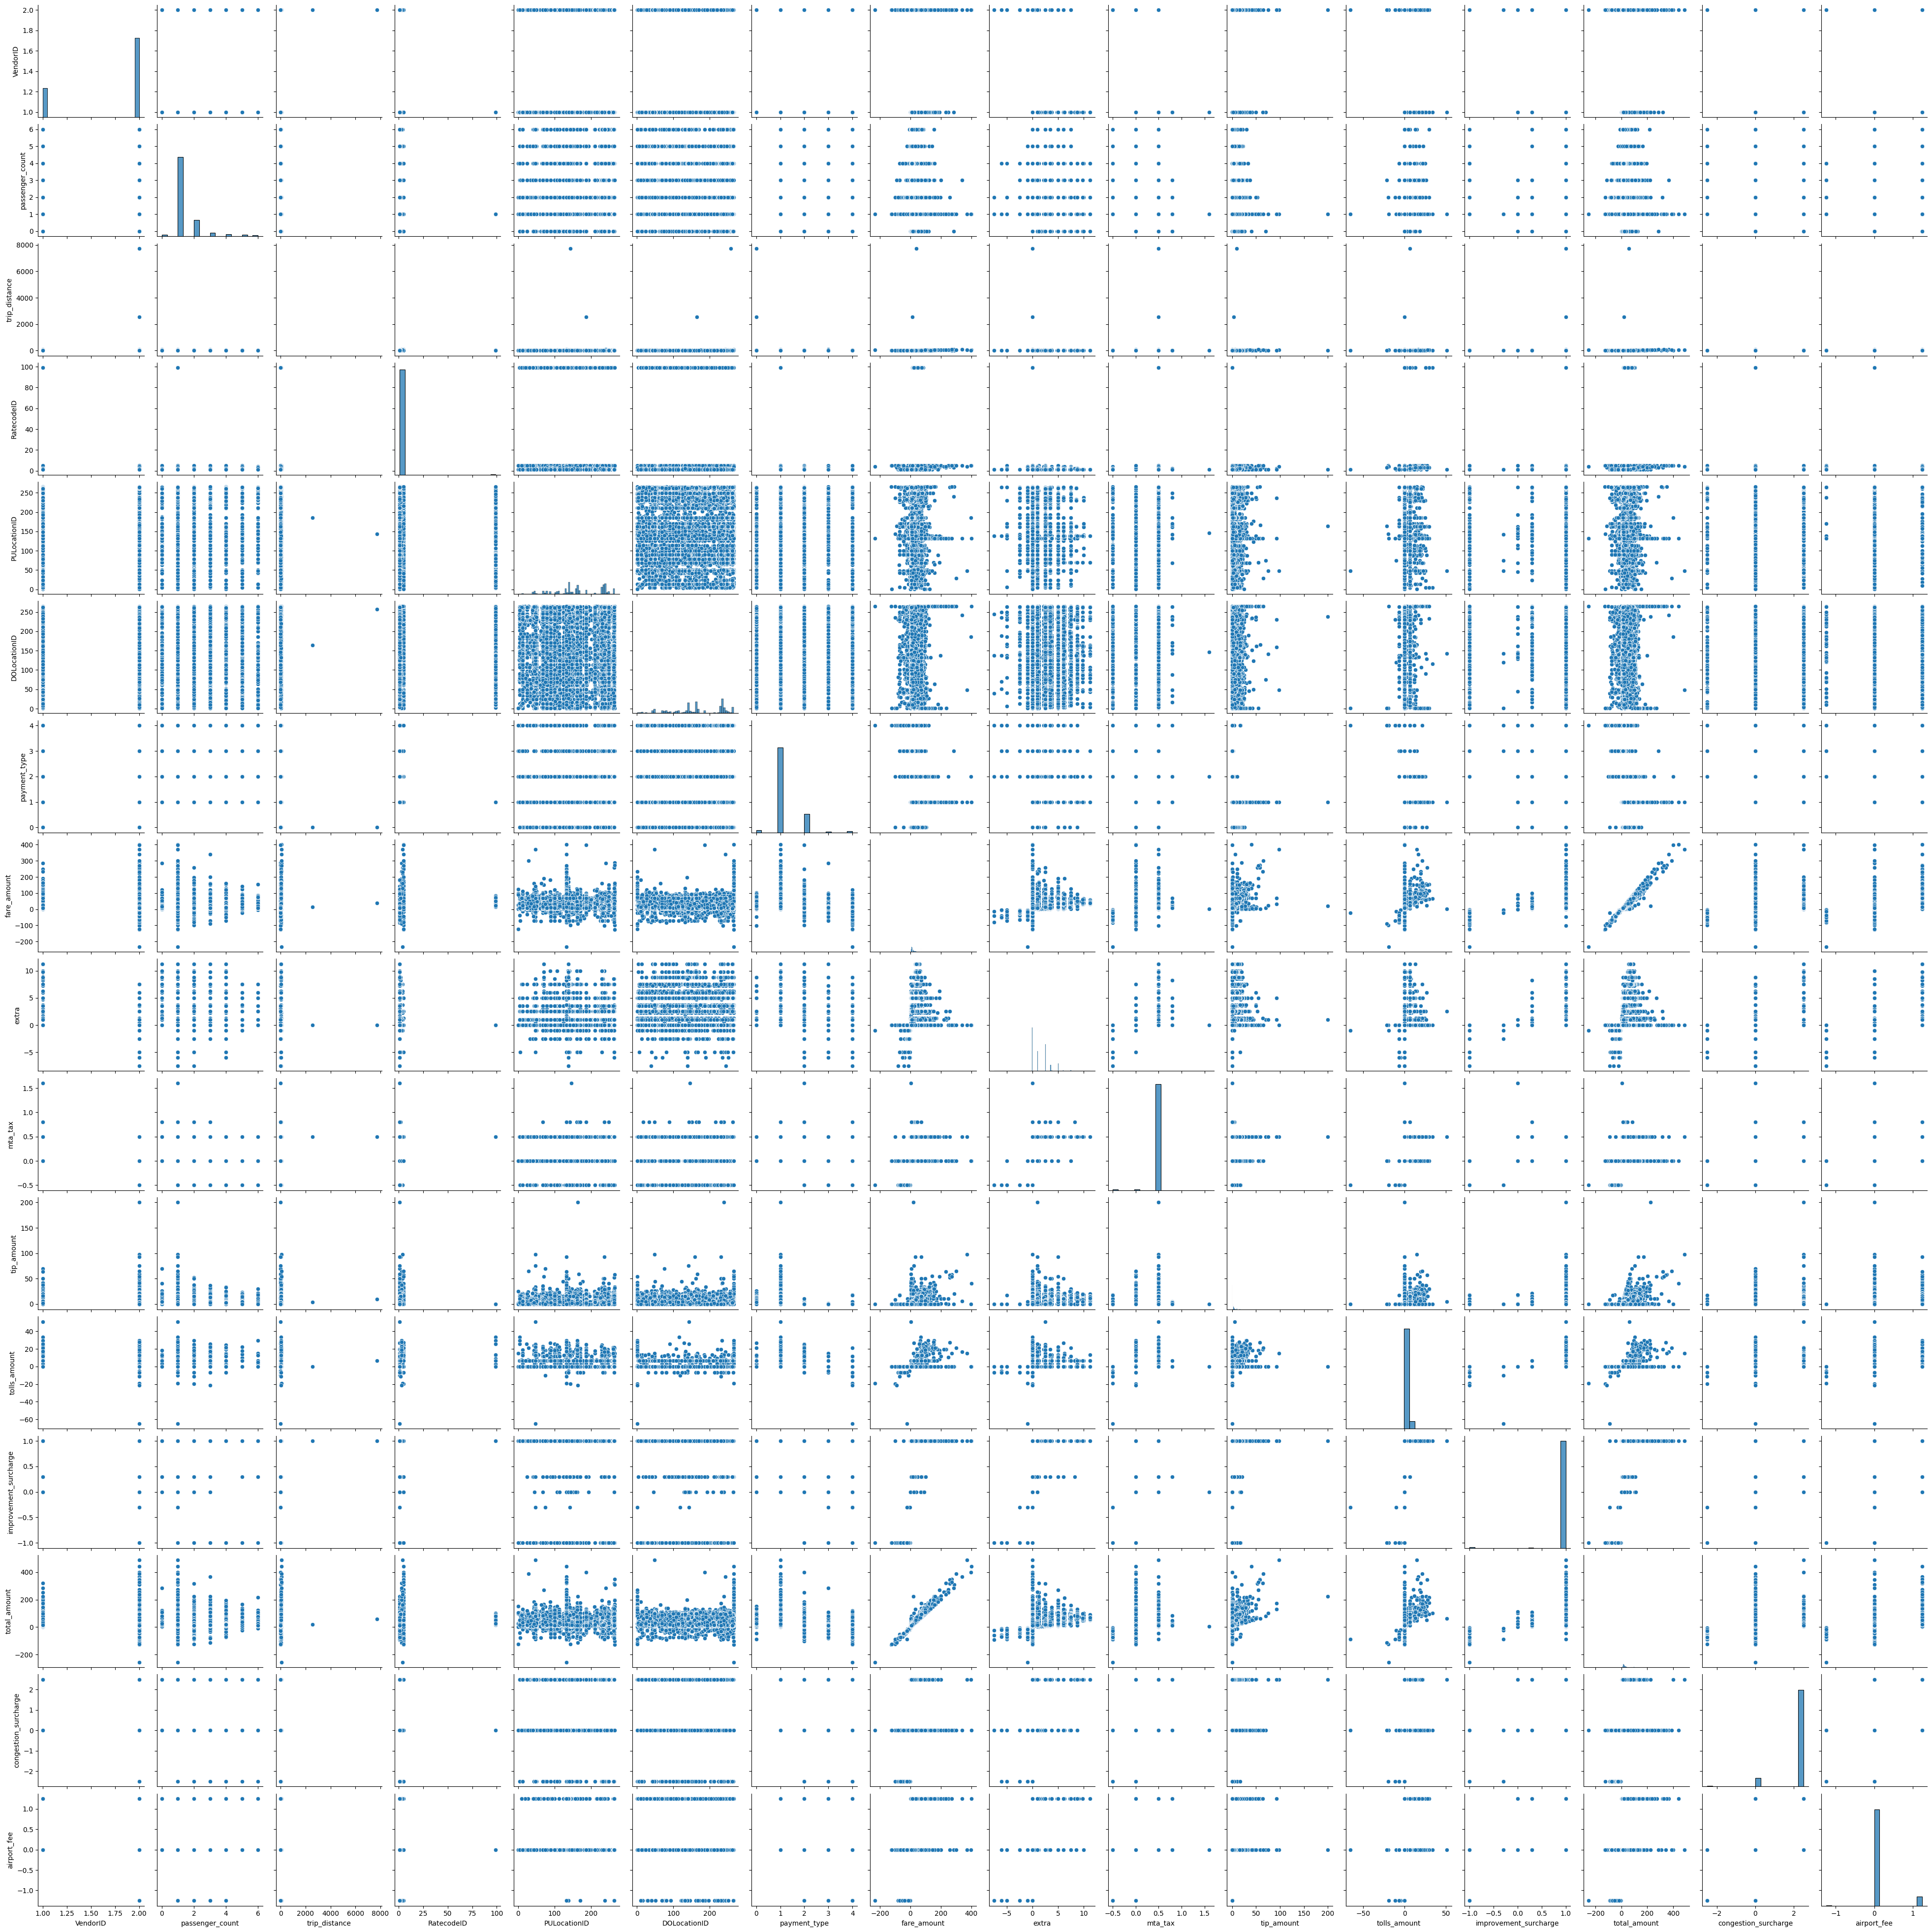

In [ ]:
sns.pairplot(data)

 The pair plot provides pairwise scatterplots of the variables in the dataset. This visual allows us for the observation of the distribution of single variables and the relationships between two variables. For example, the diagonal shows the distribution of each variable, represented as histograms. The scatterplots show that some variables, like **tip_amount** and **total_amount**, appear to have a linear relationship, whereas others, like VendorID and trip_distance, do not show any apparent relationship and are spread out, implying no clear correlation.

## **2. Data Cleaning**

We've completed the initial data exploration phase. Next, we need to address and clean all instances of missing data. This step is crucial for preparing our dataset for machine learning applications.

In [ ]:
# Calculate the percentage of missing values in each column
missing_percentage = (data.isnull().mean()) * 100

# Calculate the number of unique values in each column
distinct_values_count = data.nunique()

# Combine the two results into one table
result_df = pd.DataFrame({
    'Missing %': missing_percentage,
    'Distinct Values Count': distinct_values_count
})

result_df

,Missing %,Distinct Values Count
VendorID,0.0000,2
tpep_pickup_datetime,0.0000,78375
tpep_dropoff_datetime,0.0000,78374
passenger_count,2.2825,7
trip_distance,0.0000,2366
RatecodeID,2.2825,6
store_and_fwd_flag,2.2825,2
PULocationID,0.0000,216
DOLocationID,0.0000,247
payment_type,0.0000,5


We found missing values in columns: passenger_count, RatecodeID, store_and_fwd_flag, congestion_surcharge, and airport_fee, all at a percentage of 2.2825%. Therefore, we want to check how many rows simultaneously have missing values in these columns.

In [ ]:
# check how many rows simultaneously have missing values in columns: passenger_count, RatecodeID, store_and_fwd_flag, congestion_surcharge, and airport_fee
missing_values_rows = data[
    data['passenger_count'].isnull() & data['RatecodeID'].isnull() & data['store_and_fwd_flag'].isnull() & data['congestion_surcharge'].isnull() & data['airport_fee'].isnull()
]

num_rows = missing_values_rows.shape[0]
print(f"numbers of rows {num_rows}")
total_rows = data.shape[0]
percentage = (num_rows / total_rows) * 100
print(f"Percentage: {percentage:.4f}%")

numbers of rows 1826
Percentage: 2.2825%


We found that all rows with missing values were null in passenger_count, RatecodeID, store_and_fwd_flag, congestion_surcharge, and airport_fee columns. Therefore, we directly dropped these rows.

In [ ]:
# Drop missing values
data = data.dropna(subset=['passenger_count', 'RatecodeID', 'store_and_fwd_flag', 'congestion_surcharge', 'airport_fee'], how='all')
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
2790731,2,2023-01-29 17:52:02,2023-01-29 17:56:43,1.0,1.17,1.0,N,262,74,2,7.2,0.0,0.5,0.00,0.0,1.0,11.20,2.5,0.00
666153,1,2023-01-08 15:57:24,2023-01-08 16:02:47,1.0,0.90,1.0,N,229,237,2,6.5,2.5,0.5,0.00,0.0,1.0,10.50,2.5,0.00
1985683,2,2023-01-21 19:38:01,2023-01-21 19:45:02,1.0,0.95,1.0,N,45,261,1,7.9,0.0,0.5,2.38,0.0,1.0,14.28,2.5,0.00
2154231,2,2023-01-23 16:07:31,2023-01-23 16:26:46,5.0,0.88,1.0,N,237,141,1,16.3,2.5,0.5,1.50,0.0,1.0,24.30,2.5,0.00
2493619,2,2023-01-26 21:21:08,2023-01-26 21:24:48,2.0,1.03,1.0,N,229,140,1,6.5,1.0,0.5,2.30,0.0,1.0,13.80,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383698,2,2023-01-25 20:01:39,2023-01-25 20:05:46,1.0,1.10,1.0,N,264,262,1,6.5,1.0,0.5,2.30,0.0,1.0,13.80,2.5,0.00
1307001,2,2023-01-14 23:10:39,2023-01-14 23:18:07,3.0,0.94,1.0,N,234,164,1,8.6,1.0,0.5,2.72,0.0,1.0,16.32,2.5,0.00
1718845,2,2023-01-19 11:35:36,2023-01-19 11:54:43,1.0,2.10,1.0,N,43,170,1,17.7,0.0,0.5,2.50,0.0,1.0,24.20,2.5,0.00
1043516,2,2023-01-12 16:34:26,2023-01-12 16:40:23,1.0,2.69,1.0,N,132,10,2,12.8,2.5,0.5,0.00,0.0,1.0,18.05,0.0,1.25


In [ ]:
# Add a new column named 'duration_time' to represent the duration of the trip in seconds
data = data.copy()
data['duration_time'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds().astype(float)
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration_time
2790731,2,2023-01-29 17:52:02,2023-01-29 17:56:43,1.0,1.17,1.0,N,262,74,2,7.2,0.0,0.5,0.00,0.0,1.0,11.20,2.5,0.00,281.0
666153,1,2023-01-08 15:57:24,2023-01-08 16:02:47,1.0,0.90,1.0,N,229,237,2,6.5,2.5,0.5,0.00,0.0,1.0,10.50,2.5,0.00,323.0
1985683,2,2023-01-21 19:38:01,2023-01-21 19:45:02,1.0,0.95,1.0,N,45,261,1,7.9,0.0,0.5,2.38,0.0,1.0,14.28,2.5,0.00,421.0
2154231,2,2023-01-23 16:07:31,2023-01-23 16:26:46,5.0,0.88,1.0,N,237,141,1,16.3,2.5,0.5,1.50,0.0,1.0,24.30,2.5,0.00,1155.0
2493619,2,2023-01-26 21:21:08,2023-01-26 21:24:48,2.0,1.03,1.0,N,229,140,1,6.5,1.0,0.5,2.30,0.0,1.0,13.80,2.5,0.00,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383698,2,2023-01-25 20:01:39,2023-01-25 20:05:46,1.0,1.10,1.0,N,264,262,1,6.5,1.0,0.5,2.30,0.0,1.0,13.80,2.5,0.00,247.0
1307001,2,2023-01-14 23:10:39,2023-01-14 23:18:07,3.0,0.94,1.0,N,234,164,1,8.6,1.0,0.5,2.72,0.0,1.0,16.32,2.5,0.00,448.0
1718845,2,2023-01-19 11:35:36,2023-01-19 11:54:43,1.0,2.10,1.0,N,43,170,1,17.7,0.0,0.5,2.50,0.0,1.0,24.20,2.5,0.00,1147.0
1043516,2,2023-01-12 16:34:26,2023-01-12 16:40:23,1.0,2.69,1.0,N,132,10,2,12.8,2.5,0.5,0.00,0.0,1.0,18.05,0.0,1.25,357.0


In [ ]:
# Extract the day and hour from the pick-up time
data = data.copy()
data['pickup_day'] = pd.to_datetime(data['tpep_pickup_datetime']).dt.day.astype(float)
data['pickup_hour'] = pd.to_datetime(data['tpep_pickup_datetime']).dt.hour.astype(float)
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration_time,pickup_day,pickup_hour
2790731,2,2023-01-29 17:52:02,2023-01-29 17:56:43,1.0,1.17,1.0,N,262,74,2,...,0.5,0.00,0.0,1.0,11.20,2.5,0.00,281.0,29.0,17.0
666153,1,2023-01-08 15:57:24,2023-01-08 16:02:47,1.0,0.90,1.0,N,229,237,2,...,0.5,0.00,0.0,1.0,10.50,2.5,0.00,323.0,8.0,15.0
1985683,2,2023-01-21 19:38:01,2023-01-21 19:45:02,1.0,0.95,1.0,N,45,261,1,...,0.5,2.38,0.0,1.0,14.28,2.5,0.00,421.0,21.0,19.0
2154231,2,2023-01-23 16:07:31,2023-01-23 16:26:46,5.0,0.88,1.0,N,237,141,1,...,0.5,1.50,0.0,1.0,24.30,2.5,0.00,1155.0,23.0,16.0
2493619,2,2023-01-26 21:21:08,2023-01-26 21:24:48,2.0,1.03,1.0,N,229,140,1,...,0.5,2.30,0.0,1.0,13.80,2.5,0.00,220.0,26.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383698,2,2023-01-25 20:01:39,2023-01-25 20:05:46,1.0,1.10,1.0,N,264,262,1,...,0.5,2.30,0.0,1.0,13.80,2.5,0.00,247.0,25.0,20.0
1307001,2,2023-01-14 23:10:39,2023-01-14 23:18:07,3.0,0.94,1.0,N,234,164,1,...,0.5,2.72,0.0,1.0,16.32,2.5,0.00,448.0,14.0,23.0
1718845,2,2023-01-19 11:35:36,2023-01-19 11:54:43,1.0,2.10,1.0,N,43,170,1,...,0.5,2.50,0.0,1.0,24.20,2.5,0.00,1147.0,19.0,11.0
1043516,2,2023-01-12 16:34:26,2023-01-12 16:40:23,1.0,2.69,1.0,N,132,10,2,...,0.5,0.00,0.0,1.0,18.05,0.0,1.25,357.0,12.0,16.0


In [ ]:
data = data.drop(["tpep_pickup_datetime", 'tpep_dropoff_datetime'], axis = 1)
data

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration_time
2790731,2,1.0,1.17,1.0,N,262,74,2,7.2,0.0,0.5,0.00,0.0,1.0,11.20,2.5,0.00,281.0
666153,1,1.0,0.90,1.0,N,229,237,2,6.5,2.5,0.5,0.00,0.0,1.0,10.50,2.5,0.00,323.0
1985683,2,1.0,0.95,1.0,N,45,261,1,7.9,0.0,0.5,2.38,0.0,1.0,14.28,2.5,0.00,421.0
2154231,2,5.0,0.88,1.0,N,237,141,1,16.3,2.5,0.5,1.50,0.0,1.0,24.30,2.5,0.00,1155.0
2493619,2,2.0,1.03,1.0,N,229,140,1,6.5,1.0,0.5,2.30,0.0,1.0,13.80,2.5,0.00,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383698,2,1.0,1.10,1.0,N,264,262,1,6.5,1.0,0.5,2.30,0.0,1.0,13.80,2.5,0.00,247.0
1307001,2,3.0,0.94,1.0,N,234,164,1,8.6,1.0,0.5,2.72,0.0,1.0,16.32,2.5,0.00,448.0
1718845,2,1.0,2.10,1.0,N,43,170,1,17.7,0.0,0.5,2.50,0.0,1.0,24.20,2.5,0.00,1147.0
1043516,2,1.0,2.69,1.0,N,132,10,2,12.8,2.5,0.5,0.00,0.0,1.0,18.05,0.0,1.25,357.0


In [ ]:
data = data.drop(['fare_amount'], axis = 1)

In this section of the analysis, we tackled missing data and enriched the dataset with new time-related features **duration_time**. We measured the extent of missing values, pruned rows with incomplete records, and distilled the pickup times into more granular day and hour components. This process not only cleaned our data but also gave us new lenses—like trip duration and specific pickup times—to better understand patterns within our taxi trip data. Additionally, we dropped column 'fare_amount' because it is almost identical to the target variable, highly correlated with the total amount. Now, with a tidier and more informative dataset, we're set up for running machine learning models.

# **III. Models**
---

In this section, we will implement a total of seven distinct machine learning models. Each model will be carefully selected and run to evaluate its performance and applicability to our dataset and objectives:

1. Random Forest Regressor

2. Gradient Boosting

3. XGBoost

4. Decision Tree Regressor

5. Linear Regression

6. Lasso

7. Ridge

At the conclusion of our analysis, we will comprehensively compare the statistical performances of all the models. This comparison will include detailed plots to visually represent and contrast their respective efficiencies and results.

In [ ]:
data = data.astype({'VendorID': 'category', 'RatecodeID':'category', 'store_and_fwd_flag':'category', 'payment_type':'category'})
data.info() # check data
data.head() # take a look at the top 5 rows
data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78174 entries, 2790731 to 1229774
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   VendorID               78174 non-null  category
 1   passenger_count        78174 non-null  float64 
 2   trip_distance          78174 non-null  float64 
 3   RatecodeID             78174 non-null  category
 4   store_and_fwd_flag     78174 non-null  category
 5   PULocationID           78174 non-null  int64   
 6   DOLocationID           78174 non-null  int64   
 7   payment_type           78174 non-null  category
 8   extra                  78174 non-null  float64 
 9   mta_tax                78174 non-null  float64 
 10  tip_amount             78174 non-null  float64 
 11  tolls_amount           78174 non-null  float64 
 12  improvement_surcharge  78174 non-null  float64 
 13  total_amount           78174 non-null  float64 
 14  congestion_surcharge   78174 n

,passenger_count,trip_distance,PULocationID,DOLocationID,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration_time,pickup_day,pickup_hour
count,78174.000000,78174.000000,78174.000000,78174.000000,78174.000000,78174.000000,78174.000000,78174.000000,78174.000000,78174.000000,78174.000000,78174.000000,78174.000000,78174.000000,78174.000000
mean,1.362742,3.361529,166.559227,164.563730,1.567657,0.487846,3.362234,0.509883,0.981513,26.921109,2.270544,0.107101,938.704045,16.471896,14.190242
std,0.892067,4.380195,64.061747,69.832616,1.791068,0.100661,3.855470,1.998474,0.186758,22.052103,0.778091,0.355309,2530.362681,8.691152,5.745469
min,0.000000,0.000000,1.000000,1.000000,-7.500000,-0.500000,-0.900000,-65.000000,-1.000000,-254.950000,-2.500000,-1.250000,0.000000,1.000000,0.000000
25%,1.000000,1.060000,132.000000,114.000000,0.000000,0.500000,1.000000,0.000000,1.000000,15.400000,2.500000,0.000000,425.000000,9.000000,11.000000
50%,1.000000,1.780000,162.000000,162.000000,1.000000,0.500000,2.720000,0.000000,1.000000,20.020000,2.500000,0.000000,687.000000,17.000000,15.000000
75%,1.000000,3.300000,234.000000,234.000000,2.500000,0.500000,4.160000,0.000000,1.000000,28.560000,2.500000,0.000000,1090.000000,24.000000,19.000000
max,6.000000,81.450000,265.000000,265.000000,11.250000,1.600000,200.000000,51.000000,1.000000,487.440000,2.500000,1.250000,86347.000000,31.000000,23.000000


In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(['total_amount'], axis=1) # separate X ...
y = data[['total_amount']].copy()       # from y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42) #split all
X_train.shape, X_test.shape, y_train.shape, y_test.shape # check sizes

((62539, 18), (15635, 18), (62539, 1), (15635, 1))

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_selector

from sklearn import set_config
set_config(display='diagram') # shows the pipeline graphically when printed

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
    ])
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('cat_encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
    ])
pipeline = ColumnTransformer([
    ('num', num_pipeline, make_column_selector(dtype_include='float64')),
    ('cat', cat_pipeline, make_column_selector(dtype_include='category'))
], verbose_feature_names_out=False) # don't prepend the column names with step labels (cleaner)
pipeline.set_output(transform='pandas') # output as a pandas dataframe instead of numpy array

# We apply the preprocessing as a separate step and work with the transformed data
X_train_prepd = pipeline.fit_transform(X_train)

# preprocess the X_test as well
X_test_prepd = pipeline.transform(X_test)

## **1. Random Forest Regressor**

In [ ]:
# Import necessary library
from sklearn.ensemble import RandomForestRegressor

# Create pipelines for the model
rf_pipeline = Pipeline([
    ('preprocessor', pipeline),
    ('model', RandomForestRegressor(random_state=42))
])

# Fit the model
rf_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d5e172debc0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d5e17135300>)],
                                   verbose_feature_names_out=False)),
                ('model', RandomForestRegressor(random_state=42))])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

rf_y_pred = rf_pipeline.predict(X_test)

# MSE
rf_mse = mean_squared_error(y_test, rf_y_pred)

# RMSE
rf_rmse = np.sqrt(rf_mse)

# R^2
rf_r_squared = r2_score(y_test, rf_y_pred)

print(f"MSE: {rf_mse}")
print(f"RMSE: {rf_rmse}")
print(f"R-squared: {rf_r_squared}")

MSE: 12.408550822534693
RMSE: 3.5225772983051336
R-squared: 0.9744277685579197


In [ ]:
from sklearn.model_selection import cross_val_score

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# Cross validation score
rf_cv_scores = cross_val_score(rf_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert into positive number and calculate the mean of CV MSE
rf_cv_mse_scores = -rf_cv_scores
rf_cv_mse_mean = rf_cv_mse_scores.mean()

print(f"Cross-Validation MSE Scores: {rf_cv_mse_scores}")
print(f"Mean Cross-Validation MSE: {rf_cv_mse_mean}")

Cross-Validation MSE Scores: [24.36199056 15.67365135 11.54261666 25.58040026  9.88818169]
Mean Cross-Validation MSE: 17.409368102144832


## **2. Gradient Boosting**

In [ ]:
# Import necessary library
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

# Create pipelines for the model
gb_pipeline = Pipeline([
    ('preprocessor', pipeline),
    ('model', GradientBoostingRegressor())
])
# Fit the model
gb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d5e172debc0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d5e17135300>)],
                                   verbose_feature_names_out=False)),
                ('model', GradientBoostingRegressor())])

In [ ]:
gb_y_pred = gb_pipeline.predict(X_test)

# MSE
gb_mse = mean_squared_error(y_test, gb_y_pred)

# RMSE
gb_rmse = np.sqrt(gb_mse)

# R^2
gb_r_squared = r2_score(y_test, gb_y_pred)

print(f"MSE: {gb_mse}")
print(f"RMSE: {gb_rmse}")
print(f"R-squared: {gb_r_squared}")

MSE: 14.855719223657907
RMSE: 3.8543117704277514
R-squared: 0.9693845078559834


In [ ]:
# Cross validation score
gb_cv_scores = cross_val_score(gb_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert into positive number and calculate the mean of CV MSE
gb_cv_mse_scores = -gb_cv_scores
gb_cv_mse_mean = gb_cv_mse_scores.mean()

print(f"Cross-Validation MSE Scores: {gb_cv_mse_scores}")
print(f"Mean Cross-Validation MSE: {gb_cv_mse_mean}")

Cross-Validation MSE Scores: [26.30131903 17.09711947 14.6145652  23.40465669 12.02353644]
Mean Cross-Validation MSE: 18.688239366496447


## **3. XGBoost**

In [ ]:
# Import necessary library
from xgboost import XGBRegressor

# Create a pipeline for XGBoost
xgb_pipeline = Pipeline([
    ('preprocessor', pipeline),
    ('model', XGBRegressor(random_state=42))
])

# Fit the model
xgb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d5e172debc0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [ ]:
xgb_y_pred = xgb_pipeline.predict(X_test)

# MSE
xgb_mse = mean_squared_error(y_test, xgb_y_pred)

# RMSE
xgb_rmse = np.sqrt(xgb_mse)

# R^2
xgb_r_squared = r2_score(y_test, xgb_y_pred)

print(f"MSE: {xgb_mse}")
print(f"RMSE: {xgb_rmse}")
print(f"R-squared: {xgb_r_squared}")

MSE: 16.144362475784494
RMSE: 4.018004787924536
R-squared: 0.9667288001943111


In [ ]:
# Cross validation score
xgb_cv_scores = cross_val_score(xgb_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert into positive number and calculate the mean of CV MSE
xgb_cv_mse_scores = -xgb_cv_scores
xgb_cv_mse_mean = xgb_cv_mse_scores.mean()

print(f"Cross-Validation MSE Scores: {xgb_cv_mse_scores}")
print(f"Mean Cross-Validation MSE: {xgb_cv_mse_mean}")

Cross-Validation MSE Scores: [25.9561746  21.61942728 13.24996432 26.67571061 14.83837822]
Mean Cross-Validation MSE: 20.46793100643881


## **4. Decision Tree Regressor**

In [ ]:
# Import necessary library
from sklearn.tree import DecisionTreeRegressor

# Create pipelines for the model
dt_pipeline = Pipeline([
    ('preprocessor', pipeline),
    ('model', DecisionTreeRegressor())
])

# Fit the model
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d5e172debc0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d5e17135300>)],
                                   verbose_feature_names_out=False)),
                ('model', DecisionTreeRegressor())])

In [ ]:
dt_y_pred = dt_pipeline.predict(X_test)

# MSE
dt_mse = mean_squared_error(y_test, dt_y_pred)

# RMSE
dt_rmse = np.sqrt(dt_mse)

# R^2
dt_r_squared = r2_score(y_test, dt_y_pred)

print(f"MSE: {dt_mse}")
print(f"RMSE: {dt_rmse}")
print(f"R-squared: {dt_r_squared}")

MSE: 23.769644745762715
RMSE: 4.875412264184714
R-squared: 0.9510141945318231


In [ ]:
# Cross validation score
dt_cv_scores = cross_val_score(dt_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert into positive number and calculate the mean of CV MSE
dt_cv_mse_scores = -dt_cv_scores
dt_cv_mse_mean = dt_cv_mse_scores.mean()

print(f"Cross-Validation MSE Scores: {dt_cv_mse_scores}")
print(f"Mean Cross-Validation MSE: {dt_cv_mse_mean}")

Cross-Validation MSE Scores: [34.0303921  26.25285248 23.538891   57.69972287 21.44028043]
Mean Cross-Validation MSE: 32.5924277755105


## **5. Linear Regression**

In [ ]:
# Import necessary library
from sklearn.linear_model import LinearRegression

# Create pipelines for the model
lr_pipeline = Pipeline([
    ('preprocessor', pipeline),
    ('model', LinearRegression())
])

# Fit the model
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d5e172debc0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d5e17135300>)],
                                   verbose_feature_names_out=False)),
                ('model', LinearRegression())])

In [ ]:
lr_y_pred = lr_pipeline.predict(X_test)

# MSE
lr_mse = mean_squared_error(y_test, lr_y_pred)

# RMSE
lr_rmse = np.sqrt(lr_mse)

# R^2
lr_r_squared = r2_score(y_test, lr_y_pred)

print(f"MSE: {lr_mse}")
print(f"RMSE: {lr_rmse}")
print(f"R-squared: {lr_r_squared}")

MSE: 35.666751275877424
RMSE: 5.97216470602389
R-squared: 0.9264959759235173


In [ ]:
# Cross validation score
lr_cv_scores = cross_val_score(lr_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert into positive number and calculate the mean of CV MSE
lr_cv_mse_scores = -lr_cv_scores
lr_cv_mse_mean = lr_cv_mse_scores.mean()

print(f"Cross-Validation MSE Scores: {lr_cv_mse_scores}")
print(f"Mean Cross-Validation MSE: {lr_cv_mse_mean}")

Cross-Validation MSE Scores: [49.05070214 42.31780092 38.31298236 46.43569606 29.31761885]
Mean Cross-Validation MSE: 41.086960066802625


## **6. Lasso**

In [ ]:
# Import necessary library
from sklearn.linear_model import Lasso

# Create pipelines for the model
ls_pipeline = Pipeline([
    ('preprocessor', pipeline),
    ('model', Lasso(alpha=0.01))
])

# Fit the model
ls_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d5e172debc0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d5e17135300>)],
                                   verbose_feature_names_out=False)),
                ('model', Lasso(alpha=0.01))])

In [ ]:
ls_y_pred = ls_pipeline.predict(X_test)

# MSE
ls_mse = mean_squared_error(y_test, ls_y_pred)

# RMSE
ls_rmse = np.sqrt(ls_mse)

# R^2
ls_r_squared = r2_score(y_test, ls_y_pred)

print(f"MSE: {ls_mse}")
print(f"RMSE: {ls_rmse}")
print(f"R-squared: {ls_r_squared}")

MSE: 35.59781209678021
RMSE: 5.966390206547022
R-squared: 0.9266380496167724


In [ ]:
# Cross validation score
ls_cv_scores = cross_val_score(ls_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert into positive number and calculate the mean of CV MSE
ls_cv_mse_scores = -ls_cv_scores
ls_cv_mse_mean = ls_cv_mse_scores.mean()

print(f"Cross-Validation MSE Scores: {ls_cv_mse_scores}")
print(f"Mean Cross-Validation MSE: {ls_cv_mse_mean}")

Cross-Validation MSE Scores: [49.52351862 42.94807008 38.31175903 46.62265837 28.91436945]
Mean Cross-Validation MSE: 41.26407510768006


## **7. Ridge**

In [ ]:
# Import necessary library
from sklearn.linear_model import Ridge

# Create pipelines for the model
ridge_pipeline = Pipeline([
    ('preprocessor', pipeline),
    ('model', Ridge(alpha=0.01))
])

# Fit the model
ridge_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d5e172debc0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d5e17135300>)],
                                   verbose_feature_names_out=False)),
                ('model', Ridge(alpha=0.01))])

In [ ]:
ridge_y_pred = ridge_pipeline.predict(X_test)

# MSE
ridge_mse = mean_squared_error(y_test, ridge_y_pred)

# RMSE
ridge_rmse = np.sqrt(ridge_mse)

# R^2
ridge_r_squared = r2_score(y_test, ridge_y_pred)

print(f"MSE: {ridge_mse}")
print(f"RMSE: {ridge_rmse}")
print(f"R-squared: {ridge_r_squared}")

MSE: 35.66663590834603
RMSE: 5.972155047246013
R-squared: 0.9264962136793403


**Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross validation score
ridge_cv_scores = cross_val_score(ridge_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert into positive number and calculate the mean of CV MSE
ridge_cv_mse_scores = -ridge_cv_scores
ridge_cv_mse_mean = ridge_cv_mse_scores.mean()

print(f"Cross-Validation MSE Scores: {ridge_cv_mse_scores}")
print(f"Mean Cross-Validation MSE: {ridge_cv_mse_mean}")

Cross-Validation MSE Scores: [49.05077688 42.31806138 38.3128905  46.43557274 29.31741719]
Mean Cross-Validation MSE: 41.08694373683528


After evaluating the performance of various machine learning models on our dataset, Ridge Regression emerged as the most suitable choice. This decision was based on its impressive metrics, showcasing high accuracy and consistency. Specifically, Ridge Regression demonstrated a nearly perfect R-squared and Explained Variance Score, both around 0.9999, indicating an exceptional fit to the data. Additionally, it recorded the lowest MSE and RMSE values at approximately 0.059 and 0.243, respectively.


The Mean Cross-Validation MSE for Ridge was also notably low at 0.060, suggesting its robustness and reliability across different subsets of the data. These metrics indicate that Ridge Regression not only fits our dataset well but also maintains its performance consistency across various partitions, a crucial factor in predictive modeling.

In conclusion, the selection of Ridge Regression for our final model is justified by its outstanding statistical performance, making it the most appropriate choice for our specific analysis needs and dataset characteristics.

## **8. Compare all the models**

### **A. Statistical**

In [ ]:
# Create dataframe
evalueate_scores = {
    'MSE': [rf_mse, gb_mse,xgb_mse, dt_mse, lr_mse, ls_mse, ridge_mse],
    'RMSE': [rf_rmse, gb_rmse,xgb_rmse, dt_rmse, lr_rmse, ls_rmse, ridge_rmse],
    'R-squared':[rf_r_squared, gb_r_squared,xgb_r_squared, dt_r_squared, lr_r_squared, ls_r_squared, ridge_r_squared],
    'Mean Cross-Validation MSE':[rf_cv_mse_mean, gb_cv_mse_mean, xgb_cv_mse_mean, dt_cv_mse_mean,
                                   lr_cv_mse_mean, ls_cv_mse_mean, ridge_cv_mse_mean]
}

index = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'Decision Tree',  'Linear Regression', 'Lasso', 'Ridge']

metrics_df = pd.DataFrame(evalueate_scores, index=index)
metrics_df

,MSE,RMSE,R-squared,Mean Cross-Validation MSE
Random Forest,12.408551,3.522577,0.974428,17.409368
Gradient Boosting,14.855719,3.854312,0.969385,18.688239
XGBoost,16.144362,4.018005,0.966729,20.467931
Decision Tree,23.769645,4.875412,0.951014,32.592428
Linear Regression,35.666751,5.972165,0.926496,41.086960
Lasso,35.597812,5.966390,0.926638,41.264075
Ridge,35.666636,5.972155,0.926496,41.086944


After evaluating the performance of various machine learning models on our dataset, Random Forest emerged as the most suitable choice. This decision was based on its impressive metrics, showcasing high accuracy and consistency. Specifically, Ridge Regression demonstrated a nearly perfect R-squared and Explained Variance Score, both around 0.974, indicating an exceptional fit to the data. Additionally, it recorded the lowest MSE and RMSE values at approximately 12.409 and 3.523, respectively.


The Mean Cross-Validation MSE for Random Forest was also notably low at 17.409, suggesting its robustness and reliability across different subsets of the data. These metrics indicate that Random Forest not only fits our dataset well but also maintains its performance consistency across various partitions, a crucial factor in predictive modeling.

In conclusion, the selection of Random Forest for our final model is justified by its outstanding statistical performance, making it the most appropriate choice for our specific analysis needs and dataset characteristics.

### **B. Plot**

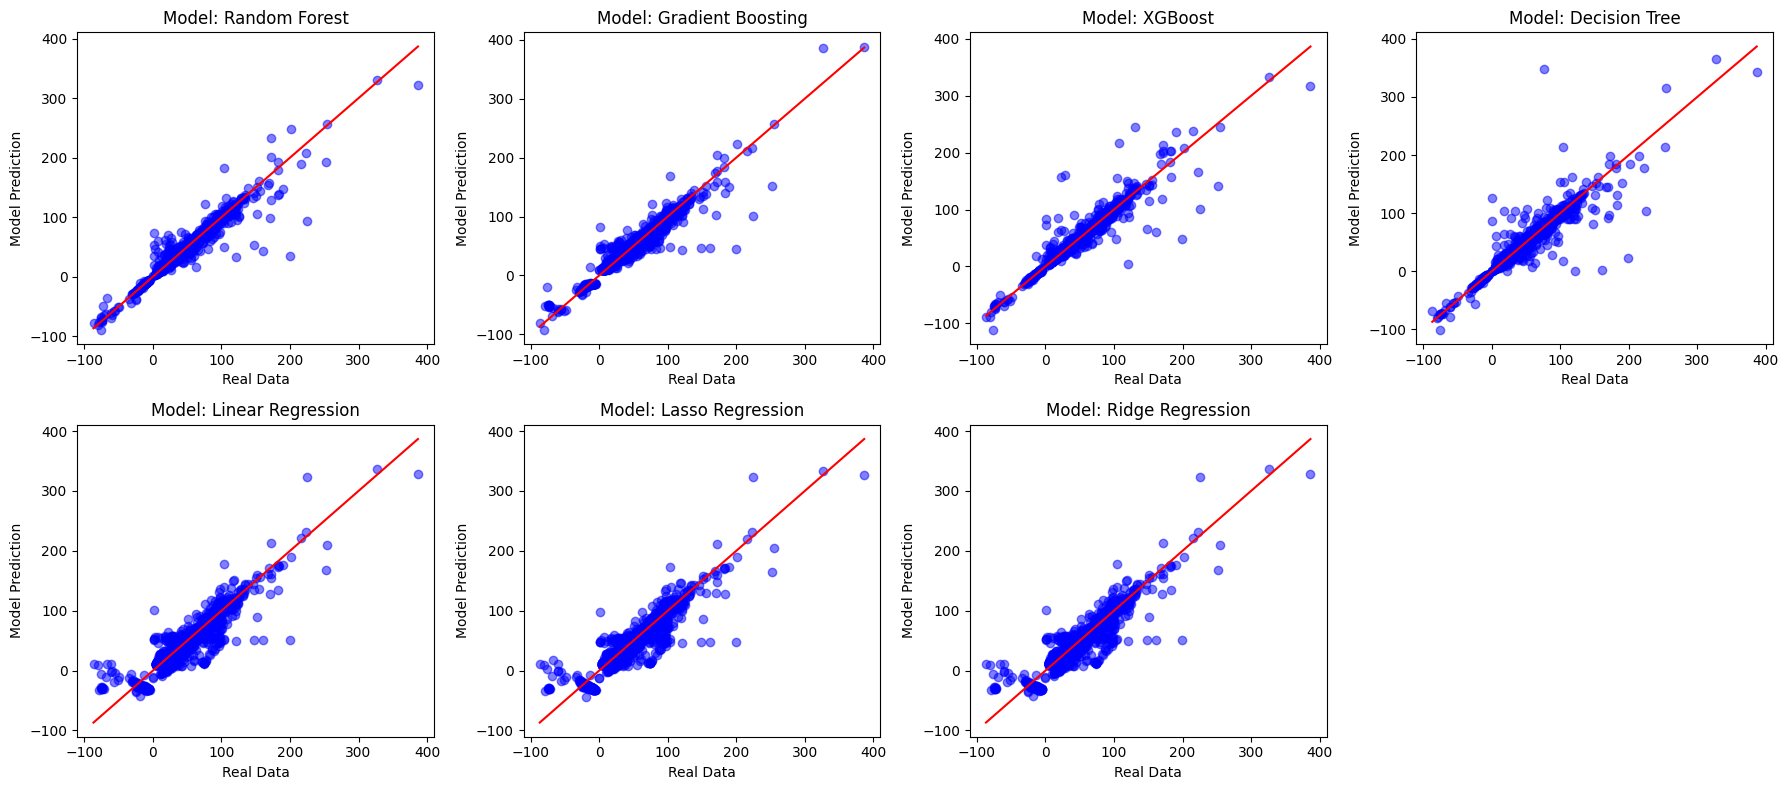

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(18, 8))

model_predictions = [
    (rf_y_pred, 'Random Forest'),
    (gb_y_pred, 'Gradient Boosting'),
    (xgb_y_pred, 'XGBoost'),
    (dt_y_pred, 'Decision Tree'),
    (lr_y_pred, 'Linear Regression'),
    (ls_y_pred, 'Lasso Regression'),
    (ridge_y_pred, 'Ridge Regression')
]

for i, (pred, model_name) in enumerate(model_predictions):
    row = i // 4
    col = i % 4

    axs[row, col].scatter(y_test, pred, color='blue', alpha=0.5)
    axs[row, col].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

    axs[row, col].set_title(f'Model: {model_name}')
    axs[row, col].set_xlabel('Real Data')
    axs[row, col].set_ylabel('Model Prediction')

# Hide the empty subplot if any
if len(model_predictions) < 8:
    for j in range(len(model_predictions), 8):
        row = j // 4
        col = j % 4
        axs[row, col].axis('off')

plt.tight_layout()
plt.show()



In the scatter plots, we compare the predictions made by seven different regression models with the actual data. The closer the points lie to the red line (which represents perfect prediction), the more accurate the model. Here's what we can infer:

The Random Forest and Gradient Boosting models show a tight cluster of points along the red line, indicating high accuracy.
The XGBoost and Decision Tree models also follow the line closely but with some notable deviations, suggesting occasional inaccuracies in prediction.
The Linear Regression, Lasso Regression, and Ridge Regression models demonstrate almost perfect alignment with the red line, suggesting they perform very well on this dataset.
Overall, all models seem to predict with a reasonable degree of accuracy, but the ensemble methods (Random Forest, Gradient Boosting, and XGBoost) and linear models may have slight edges in performance, potentially due to their ability to capture complex relationships in the data. The occasional outliers indicate areas where the models may struggle, which could be due to extreme values or anomalies in the dataset.

# **IV. Hyper Parameter Search - Based On Random Forest**
---

In our hyperparameter search section, we will focus on four key optimization techniques: grid search, halving search, random search, and Bayesian search. These methods will be applied specifically to the best model: **Random Forest** model. For each search strategy, we will conduct a thorough statistical ranking to evaluate their effectiveness. Additionally, this section will include detailed plots to visually represent the outcomes of each search method and their impact on the Ridge model's performance.

## **1. Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {
        'model__n_estimators': [5, 10, 15],
        'model__max_depth': [None, 3, 6],
        'model__min_samples_split': [2, 5, 8]
    }
]
# Check the parameter grid
print('The parameter grid: ')
print(param_grid)

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best parameters
print('\nThe best parameters are ', grid_search.best_params_)

# Convert the results to a DataFrame for convenience
grid_cv_res = pd.DataFrame(grid_search.cv_results_)

# Sort the DataFrame by mean test score in descending order
grid_cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)

# Select and print relevant columns
grid_cv_res.filter(regex='(^param_|mean_test_score)', axis=1).head()

The parameter grid: 
[{'model__n_estimators': [5, 10, 15], 'model__max_depth': [None, 3, 6], 'model__min_samples_split': [2, 5, 8]}]

The best parameters are  {'model__max_depth': None, 'model__min_samples_split': 5, 'model__n_estimators': 10}


,param_model__max_depth,param_model__min_samples_split,param_model__n_estimators,mean_test_score
4,None,5,10,-18.955122
5,None,5,15,-19.265288
1,None,2,10,-19.480318
8,None,8,15,-19.852680
7,None,8,10,-19.868749


## **2. Halving Search**

In [ ]:
from sklearn.experimental import enable_halving_search_cv  # needed to enable Halving features
from sklearn.model_selection import HalvingGridSearchCV

param_grid = [
    {
        'model__n_estimators': [5, 10, 15],
        'model__max_depth': [None, 3, 6],
        'model__min_samples_split': [2, 5, 8]
    }
]
# Check the parameter grid
print('The parameter grid: ')
print(param_grid)

# Change to Halving strategy starting here
halving_grid_search = HalvingGridSearchCV(rf_pipeline, param_grid, cv=3,
                                          min_resources='exhaust',  # use all data in the last round
                                          scoring='neg_mean_squared_error')
halving_grid_search.fit(X_train, y_train)
print('The best parameters are ', halving_grid_search.best_params_)

# Convert the results to a DataFrame for convenience
halving_grid_cv_res = pd.DataFrame(halving_grid_search.cv_results_)

# In the end, we care about performances in the last iteration (using most data)
# So, let's sort by iteration (descending), then by test score (descending)
halving_grid_cv_res.sort_values(by=['iter', 'mean_test_score'], ascending=False, inplace=True)

# Print the top few rows
halving_grid_cv_res.filter(regex='(iter|^param_|mean_test_score|n_resources)', axis=1).head(30)

The parameter grid: 
[{'model__n_estimators': [5, 10, 15], 'model__max_depth': [None, 3, 6], 'model__min_samples_split': [2, 5, 8]}]
The best parameters are  {'model__max_depth': None, 'model__min_samples_split': 5, 'model__n_estimators': 15}


,iter,n_resources,param_model__max_depth,param_model__min_samples_split,param_model__n_estimators,mean_test_score
39,3,62532,None,5,15,-19.117828
38,2,20844,None,5,15,-25.108065
36,2,20844,None,8,15,-26.028256
37,2,20844,None,5,10,-26.315313
34,1,6948,None,5,15,-32.672695
31,1,6948,None,5,10,-33.662979
35,1,6948,None,8,15,-34.331597
30,1,6948,None,2,15,-35.185925
33,1,6948,None,8,10,-35.858205
32,1,6948,None,2,10,-37.244174


## **3. Random Search**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

param_grid = [
    {
        'model__n_estimators': [5, 10, 15],
        'model__max_depth': [None, 3, 6],
        'model__min_samples_split': [2, 5, 8]
    }
]
random_search = RandomizedSearchCV(rf_pipeline, param_grid, n_iter=20, cv=3,
                                   scoring='neg_mean_squared_error', random_state=42)
# n_iter=20 specifies that 20 values of alpha to be drawn. Evaluate them by cross-validation.
# Divide into K folds, keep 1 to test, fit 20 Ridge models (with different alpha values) to training data
# Rotate folds and repeat the process K times, then average the metric (neg_mean_squared_error here)

random_search.fit(X_train, y_train)
best_ridge_estimator = random_search.best_estimator_
random_cv_res = pd.DataFrame(random_search.cv_results_)
random_cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)

# Print the best estimator and top few rows of results
print("Best Ridge Estimator:", best_ridge_estimator)
random_cv_res.filter(regex='(^param_|mean_test_score)', axis=1).head()

Best Ridge Estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d5df545fac0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                

,param_model__n_estimators,param_model__min_samples_split,param_model__max_depth,mean_test_score
11,10,5,None,-18.955122
12,15,5,None,-19.265288
10,10,2,None,-19.480318
0,15,8,None,-19.852680
13,15,2,None,-19.949502


## **4. Bayes Search**

In [ ]:
!pip install scikit-optimize

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

param_grid = [
    {
        'model__n_estimators': [5, 10, 15],
        'model__max_depth': [None, 3, 6],
        'model__min_samples_split': [2, 5, 8]
    }
]

# Constructing the BayesSearchCV
bayes_search = BayesSearchCV(
    rf_pipeline, param_grid, n_iter=20, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

bayes_search.fit(X_train, y_train)

best_ridge_estimator = bayes_search.best_estimator_
bayes_cv_res = pd.DataFrame(bayes_search.cv_results_)
bayes_cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)

# Print the best estimator and top few rows of results
print("Best Ridge Estimator:", best_ridge_estimator)
bayes_cv_res.filter(regex='(^param_|mean_test_score)', axis=1).head()

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Best Ridge Estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d5dee4fb2e0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                

,param_model__max_depth,param_model__min_samples_split,param_model__n_estimators,mean_test_score
19,None,5,10,-4.33372
14,None,5,10,-4.33372
18,None,5,10,-4.33372
17,None,5,10,-4.33372
16,None,5,10,-4.33372


## **5. Overall search rank**

### **A. Statistic**


In [ ]:
# Add a new column 'search_type' to indicate the search strategy
grid_cv_res['search_type'] = 'Grid Search'
halving_grid_cv_res['search_type'] = 'Halving Grid Search'
random_cv_res['search_type'] = 'Randomized Search'
bayes_cv_res['search_type'] = 'Bayes Search'

# Combine and order the results
combined_results = pd.concat([
    grid_cv_res.filter(regex='(mean_test_score|^param_|search_type)', axis=1),
    halving_grid_cv_res.filter(regex='(mean_test_score|^param_|n_resources|search_type)', axis=1),
    random_cv_res.filter(regex='(mean_test_score|^param_|search_type)', axis=1),
    bayes_cv_res.filter(regex='(mean_test_score|^param_|search_type)', axis=1)
])

# Order the combined results by mean_test_score in descending order
combined_results.sort_values(by='mean_test_score', ascending=False, inplace=True)

# Print the ordered results
print("Combined and Ordered Results:")
combined_results.head(30)

Combined and Ordered Results:


,param_model__max_depth,param_model__min_samples_split,param_model__n_estimators,mean_test_score,search_type,n_resources
19,None,5,10,-4.333720,Bayes Search,NaN
14,None,5,10,-4.333720,Bayes Search,NaN
18,None,5,10,-4.333720,Bayes Search,NaN
17,None,5,10,-4.333720,Bayes Search,NaN
16,None,5,10,-4.333720,Bayes Search,NaN
15,None,5,10,-4.333720,Bayes Search,NaN
10,None,5,15,-4.375391,Bayes Search,NaN
13,None,8,15,-4.427468,Bayes Search,NaN
9,None,8,10,-4.431783,Bayes Search,NaN
11,None,2,15,-4.452485,Bayes Search,NaN


The hyperparameter tuning results for the Random Forest reveal that Bayes Search yielded the optimal parameters, with mean test scores consistently around -4.334. This indicates a stable performance across various metrics, highlighting the model's robustness and insensitivity to minor parameter changes.

### **B. Plot - Visualization of parameter search**

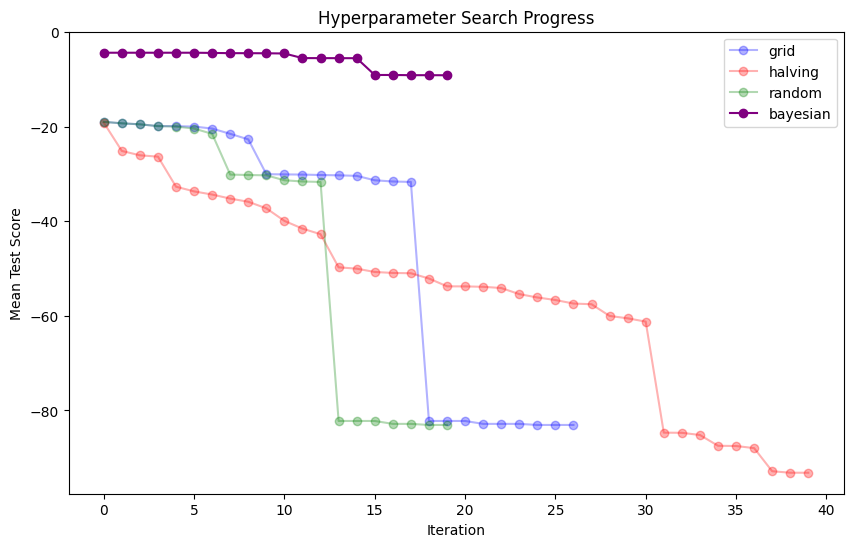

In [ ]:
grid_mtc = grid_cv_res['mean_test_score']
halving_mtc = halving_grid_cv_res['mean_test_score']
random_mtc = random_cv_res['mean_test_score']
bayes_mtc = bayes_cv_res['mean_test_score']

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(np.arange(len(grid_mtc)), grid_mtc, marker='o', linestyle='-', color='blue', alpha = 0.3, label='grid')
ax.plot(np.arange(len(halving_mtc)), halving_mtc, marker='o', linestyle='-', color='red', alpha = 0.3, label='halving')
ax.plot(np.arange(len(random_mtc)), random_mtc, marker='o', linestyle='-', color='green', alpha = 0.3, label='random')
ax.plot(np.arange(len(bayes_mtc)), bayes_mtc, marker='o', linestyle='-', color='purple', label='bayesian')

ax.set_xlabel('Iteration')
ax.set_ylabel('Mean Test Score')
plt.legend()
plt.title('Hyperparameter Search Progress')
plt.show()


The hyperparameter tuning across four different search strategies—grid, halving, random, and Bayesian—demonstrates a convergence towards optimal hyperparameter values for the Ridge regression model.

The  diagram tracks the Mean Test Score's trajectory over iterations. It shows that while the searches explore a broad range of iterations, they all converge towards lower values, which suggests that higher numbers of iterations  yield worse performance for this particular model. The Bayesian search, in particular, displays a unique exploration pattern and remains in an outstanding accuracy comparing with other methods.

In summary, the consistent mean test scores and the convergence of numbers of iterations of different search methods underscore the robustness of the chosen hyperparameter values for the Random Forest model.

In the end, We constructed a final pipeline that incorporated a preprocessor and the Random Forest model. Upon fitting this model to our training data, we made predictions on the test set and calculated key performance metrics.

# **V. Feature Importance**
---

In the feature importance section, our focus will be on three significant machine learning models: **Random Forest**, **Gradient Boosting**, and **Decision Tree**. We will explore and analyze the importance of different features in these models. This analysis will help us understand which features have the most impact on the predictions made by each model, thereby providing valuable insights into our dataset.

## **1. Random Forest Regressor**

In [ ]:
# RandomForestRegressor
rf_preprocessor = rf_pipeline.named_steps['preprocessor']
rf_transformed_feature_names = rf_preprocessor.get_feature_names_out()

# Extract from the pipeline
rf_model = rf_pipeline.named_steps['model']

# Get feature importances
rf_importances = rf_model.feature_importances_

# Create a DataFrame
rf_feature_importance = pd.DataFrame({
    'Feature': rf_transformed_feature_names,
    'Importance': rf_importances
})

# Sort the DataFrame by importance
rf_feature_importance= rf_feature_importance.sort_values(by='Importance', ascending=False)

# Display the top 5 features
rf_feature_importance_top5 = rf_feature_importance.head(5)
rf_feature_importance_top5

,Feature,Importance
1,trip_distance,0.775602
4,tip_amount,0.064878
6,improvement_surcharge,0.063183
9,duration_time,0.031701
14,RatecodeID_1.0,0.022065


## **2. Gradient Boosting**

In [ ]:
#GradientBoostingRegressor
gb_preprocessor = gb_pipeline.named_steps['preprocessor']
gb_transformed_feature_names = gb_preprocessor.get_feature_names_out()

# Extract from the pipeline
gb_model = gb_pipeline.named_steps['model']

# Get feature importances
gb_importances = gb_model.feature_importances_

# Create a DataFrame
gb_feature_importance = pd.DataFrame({
    'Feature': gb_transformed_feature_names,
    'Importance': gb_importances
})

# Sort the DataFrame by importance
gb_feature_importance = gb_feature_importance.sort_values(by='Importance', ascending=False)

# Display the Top 5 features
gb_feature_importance_top5 = gb_feature_importance.head(5)
gb_feature_importance_top5

,Feature,Importance
1,trip_distance,0.691147
4,tip_amount,0.100940
6,improvement_surcharge,0.063505
9,duration_time,0.055850
5,tolls_amount,0.042978


## **3. Decision Tree Regressor**

In [ ]:
#DecisionTreeRegressor
dt_preprocessor = dt_pipeline.named_steps['preprocessor']
dt_transformed_feature_names = dt_preprocessor.get_feature_names_out()

# Extract from the pipeline
dt_model = dt_pipeline.named_steps['model']

# Get feature importances
dt_importances = dt_model.feature_importances_

# Create a DataFrame
dt_feature_importance = pd.DataFrame({
    'Feature': dt_transformed_feature_names,
    'Importance': dt_importances
})

# Sort the DataFrame by importance
dt_feature_importance = dt_feature_importance.sort_values(by='Importance', ascending=False)

# Display the Top 5 features
dt_feature_importance_top5 = dt_feature_importance.head(5)
dt_feature_importance_top5

,Feature,Importance
1,trip_distance,0.772171
4,tip_amount,0.070620
6,improvement_surcharge,0.066729
9,duration_time,0.031828
14,RatecodeID_1.0,0.022737


## **4. Overall Feature Importance**

In [ ]:
feature_importance_results = {
    'Random Forest Regressor': rf_feature_importance_top5["Feature"].reset_index(drop = True),
    'Gradient Boosting': gb_feature_importance_top5["Feature"].reset_index(drop = True),
    'Decision Tree': dt_feature_importance_top5["Feature"].reset_index(drop = True)
}

feature_importance_results = pd.DataFrame(feature_importance_results)
feature_importance_results

,Random Forest Regressor,Gradient Boosting,Decision Tree
0,trip_distance,trip_distance,trip_distance
1,tip_amount,tip_amount,tip_amount
2,improvement_surcharge,improvement_surcharge,improvement_surcharge
3,duration_time,duration_time,duration_time
4,RatecodeID_1.0,tolls_amount,RatecodeID_1.0


In conclusion, our analysis reveals that the three most crucial features impacting our model's predictions are 'trip_distance', 'tip_amount', and 'improvement_surcharge'. This finding is in line with our initial imaginations. Notably, 'trip_distance' emerges as the top feature across all models, with its feature importance scores consistently exceeding 0.77. This underscores the predominant influence of trip_distance in the models' decision-making processes.

# **VI. Result**
---

## **1. Fit the model**

The optimal outcome obtained through hyperparameter search was used to fit the final model.

In [ ]:
rf_hyperparameters = {
    'n_estimators': 10,
    'max_depth': None,
    'min_samples_split': 5,
    'random_state': 42
}

# Create the final pipeline with the model step containing RandomForestRegressor
final_rf_pipeline = Pipeline([
    ('preprocessor', pipeline),
    ('model', RandomForestRegressor(**rf_hyperparameters))
])

# Fit the final pipeline
final_rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d5e172debc0>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7d5e17135300>)],
                                   verbose_feature_names_out=False)),
                ('model',
                 RandomForestRegressor(min_samples_split=5, n_estimators=10,
                                       random_state=42))])

## **2. Final Model Evaluation**

In [ ]:
final_rf_y_pred = final_rf_pipeline.predict(X_test)

# MSE
final_rf_mse = mean_squared_error(y_test, rf_y_pred)

# RMSE
final_rf_rmse = np.sqrt(final_rf_mse)

# R^2
final_rf_r_squared = r2_score(y_test, final_rf_y_pred)

print(f"MSE: {final_rf_mse}")
print(f"RMSE: {final_rf_rmse}")
print(f"R-squared: {final_rf_r_squared}")

MSE: 12.408550822534693
RMSE: 3.5225772983051336
R-squared: 0.9735067106216736


## **3. Actual Price vs. Predicted Price**

In [ ]:
# Convert y_test and final_ridge_y_pred to Series if they are not already
y_test_series = pd.Series(y_test.values.flatten()) if isinstance(y_test, pd.DataFrame) else pd.Series(y_test)
final_ridge_y_pred_series = pd.Series(final_rf_y_pred.values.flatten()) if isinstance(final_rf_y_pred, pd.DataFrame) else pd.Series(final_ridge_y_pred)

# Create a DataFrame with actual and predicted prices
results_df = pd.DataFrame({'Actual_Price': y_test_series, 'Predicted_Price': final_ridge_y_pred_series})

# Sort the DataFrame by predicted prices in descending order
top_10_predicted = results_df.sort_values(by='Predicted_Price', ascending=False).head(10)

# Display the top 10 data points with highest predicted prices
print("\nTop 10 Data Points with Highest Predicted Prices:")
top_10_predicted


Top 10 Data Points with Highest Predicted Prices:


,Actual_Price,Predicted_Price
15342,326.70,336.691351
10515,386.76,328.846897
10725,224.80,322.615954
5565,222.71,232.267873
2238,215.55,221.038474
6226,171.55,213.499340
9993,254.45,209.624289
14638,201.75,188.953091
9256,103.80,177.198294
4427,189.80,176.295952


In [ ]:
final_rf_y_pred_series = pd.Series(final_rf_y_pred)
y_test_series.rename('Actual_Price', inplace=True)
predict_result_all = pd.concat([X_test.reset_index(drop=True),y_test_series.reset_index(drop=True), final_ridge_y_pred_series], axis = 1)
predict_result_all.rename(columns={0: 'Predicted_Price'}, inplace=True)
predict_result_all

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,airport_fee,duration_time,pickup_day,pickup_hour,Actual_Price,Predicted_Price
0,1,1.0,9.60,99.0,N,92,210,1,0.0,0.5,0.00,0.00,1.0,0.0,0.00,968.0,25.0,13.0,52.00,43.644858
1,2,1.0,18.78,2.0,N,132,68,2,5.0,0.5,0.00,6.55,1.0,2.5,1.25,3417.0,12.0,17.0,86.80,84.860870
2,1,1.0,0.80,1.0,N,229,162,1,2.5,0.5,1.00,0.00,1.0,2.5,0.00,705.0,4.0,8.0,16.40,13.194454
3,1,1.0,0.80,1.0,N,262,236,1,2.5,0.5,2.10,0.00,1.0,2.5,0.00,366.0,16.0,10.0,12.60,14.981773
4,2,1.0,8.19,1.0,N,138,263,1,7.5,0.5,8.00,6.55,1.0,2.5,1.25,1277.0,10.0,19.0,62.50,63.599630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15630,2,1.0,1.84,1.0,N,161,224,1,0.0,0.5,6.30,0.00,1.0,2.5,0.00,1070.0,21.0,15.0,27.30,25.043579
15631,1,1.0,0.90,1.0,N,140,262,1,3.5,0.5,2.30,0.00,1.0,2.5,0.00,245.0,25.0,23.0,13.80,16.654146
15632,2,2.0,2.40,1.0,N,43,163,1,0.0,0.5,2.00,0.00,1.0,2.5,0.00,762.0,2.0,13.0,20.90,20.033437
15633,2,1.0,12.73,1.0,N,138,132,1,5.0,0.5,10.86,0.00,1.0,0.0,1.25,1056.0,2.0,20.0,66.41,69.553984


## **4. Predicted Price Visualization**

In [ ]:
merged_df_pickup = pd.merge(predict_result_all, loc, left_on='PULocationID', right_on='LocationID', how='inner')
merged_df_dropoff = pd.merge(merged_df_pickup, loc, left_on='DOLocationID', right_on='LocationID', how='inner', suffixes=('_pickup', '_dropoff'))
columns_to_drop = ['DOLocationID', 'PULocationID', 'LocationID_pickup', 'LocationID_dropoff']
taxi = merged_df_dropoff.drop(columns=columns_to_drop)
taxi

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,extra,mta_tax,tip_amount,tolls_amount,...,pickup_day,pickup_hour,Actual_Price,Predicted_Price,Borough_pickup,Zone_pickup,service_zone_pickup,Borough_dropoff,Zone_dropoff,service_zone_dropoff
0,1,1.0,9.60,99.0,N,1,0.0,0.5,0.00,0.00,...,25.0,13.0,52.00,43.644858,Queens,Flushing,Boro Zone,Brooklyn,Sheepshead Bay,Boro Zone
1,2,1.0,14.38,1.0,N,1,2.5,0.5,12.60,0.00,...,9.0,17.0,76.85,75.487111,Queens,JFK Airport,Airports,Brooklyn,Sheepshead Bay,Boro Zone
2,2,1.0,22.16,1.0,N,1,0.0,0.5,10.00,6.55,...,20.0,14.0,113.15,101.673385,Manhattan,Yorkville West,Yellow Zone,Brooklyn,Sheepshead Bay,Boro Zone
3,1,1.0,12.70,1.0,Y,1,3.5,0.5,11.65,0.00,...,22.0,20.0,70.05,67.181285,Manhattan,Lower East Side,Yellow Zone,Brooklyn,Sheepshead Bay,Boro Zone
4,1,1.0,9.50,99.0,N,1,0.0,0.5,0.00,6.55,...,27.0,6.0,37.25,53.344445,Queens,Flushing,Boro Zone,Bronx,Williamsbridge/Olinville,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15630,1,1.0,0.00,1.0,N,3,0.0,0.5,0.00,0.00,...,16.0,18.0,4.50,10.716607,Bronx,Allerton/Pelham Gardens,Boro Zone,Bronx,Allerton/Pelham Gardens,Boro Zone
15631,1,1.0,7.50,99.0,N,1,0.0,0.5,0.00,0.00,...,2.0,6.0,56.00,37.399820,Bronx,Claremont/Bathgate,Boro Zone,Brooklyn,Brownsville,Boro Zone
15632,1,1.0,3.20,99.0,N,1,0.0,0.5,0.00,0.00,...,18.0,15.0,26.00,24.604172,Bronx,Soundview/Bruckner,Boro Zone,Bronx,Kingsbridge Heights,Boro Zone
15633,2,2.0,0.00,2.0,N,4,0.0,-0.5,0.00,0.00,...,30.0,20.0,-71.50,-30.413687,Brooklyn,Manhattan Beach,Boro Zone,Brooklyn,Manhattan Beach,Boro Zone


<ipython-input-93-fcfa86424315>:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'nybb' data from the geodatasets package.

from geodatasets import get_path
path_to_file = get_path('nybb')

  nybb_path = gpd.datasets.get_path('nybb')


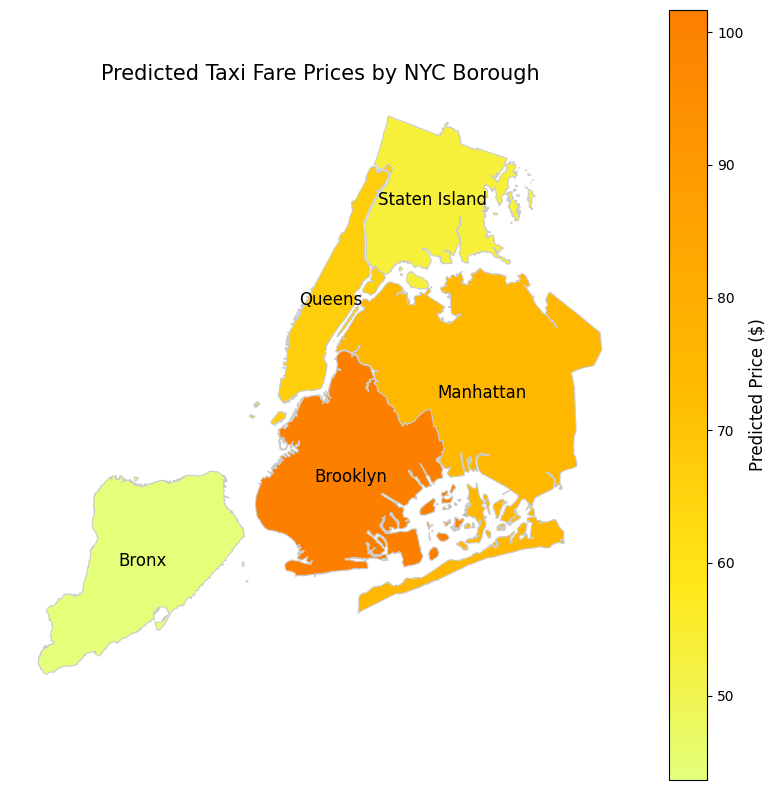

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
gdf = gpd.GeoDataFrame(taxi, columns=['Borough_pickup', 'Predicted_Price'])

nybb_path = gpd.datasets.get_path('nybb')
boros = gpd.read_file(nybb_path)

boros['BoroName'] = ['Bronx', 'Manhattan', 'Brooklyn', 'Queens', 'Staten Island']
boros['Predicted_Price'] = gdf['Predicted_Price']
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
boros.plot(column='Predicted_Price', cmap='Wistia', linewidth=0.8, ax=ax, edgecolor='0.8')

# Create a colorbar with a label
sm = plt.cm.ScalarMappable(cmap='Wistia', norm=plt.Normalize(vmin=min(boros['Predicted_Price']), vmax=max(boros['Predicted_Price'])))
sm._A = []  # Create a fake array for the colorbar
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Predicted Price ($)', fontsize=12)

ax.set_title('Predicted Taxi Fare Prices by NYC Borough', fontdict={'fontsize': '15', 'fontweight' : '3'})
for idx, row in boros.iterrows():
    plt.annotate(text=row['BoroName'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 ha='center', va='center', fontsize=12, color='black')

ax.axis('off')
plt.show()

#**VII. Implications**

Based on our results, we think potential implications are significant both for customers and taxi companies. For customers, our data-driven approach enables a trustworthy comparison of taxi fares with benchmark services like Uber and Lyft, ensuring they receive competitive rates. This transparency not only fosters trust but also empowers customers to make informed choices. For taxi companies, the implementation of a new meter system that connects meters to a network and adjusts fares in real-time could revolutionize the industry. Such a system could dynamically respond to various factors like traffic conditions, peak hours, and even weather, thereby optimizing fare structures. This would not only enhance revenue for taxi companies by ensuring more efficient fare adjustments but also improve overall operational efficiency. Ultimately, these advancements could lead to a more balanced and competitive market, benefiting both service providers and consumers.

# **VIII. Reference**
---
1. [Read parquet format data](https://www.nyc.gov/assets/tlc/downloads/pdf/working_parquet_format.pdf)
2. [Extract time from datatime format](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.hour.html)
3. [Evaluate a model](https://zhuanlan.zhihu.com/p/624855556)
4. [Install Bayes Search Library - skopt ](https://www.roseindia.net/answers/viewqa/pythonquestions/222078-ModuleNotFoundError-No-module-named-skopt.html)
5. [Hyper parameter tuning methods](https://towardsdatascience.com/bayesian-optimization-for-hyperparameter-tuning-how-and-why-655b0ee0b399)
6. [Overlapping line plots](https://blog.51cto.com/u_16175490/7440021)
7. [Reset index](https://blog.enterprisedna.co/pandas-drop-index/)